# Задача о максимальном паросочетании

Найдите максимальное паросочетание и минимальное вершинное покрытие в двудольном графе.

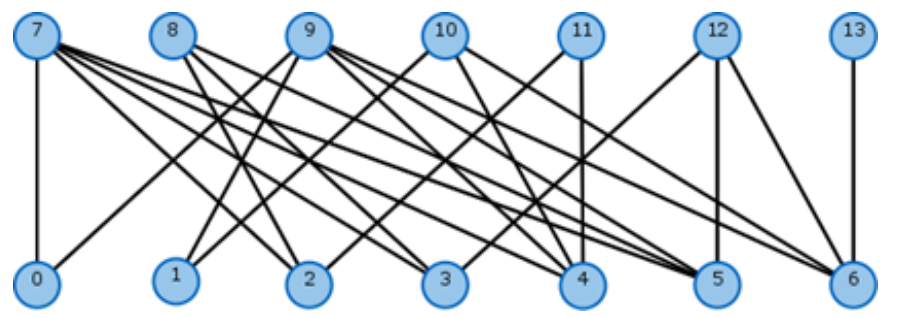

**Сочетанием (matching)** простого графа называется его подмножество рёбер, никакие два
из которых не имеют общей вершины.

**Задача о максимальном паросочетании (matching problem)** заключается в нахождении по
данному графу сочетания максимального размера.

**Минимальное вершинное покрытие (minimum vertex cover, MVC)** — минимальный по размеру набор вершин, содержащий хотя бы один конец каждого ребра.

**Мощность паросочетания** -- это количество рёбер в нём.

Для решения задачи о максимальном паросочетании используется алгоритм Форда-Фалкерсона. Суть алгоритма состоит в том, что вводятся две фиктивные вершины истока и стока, и для обновленного графа применяется алгоритм Форда-Фалкерсона для нахождения максимального потока в сети.

Знание максимального паросочетания позволяет получить минимальное вершинное
покрытие с помощью доказательства теоремы Кёнига -- в произвольном двудольном графе мощность максимального паросочетания равна мощности минимального вершинного покрытия. Это можно осуществить следующим образом:

- При построенном паросочетанни, ориентируем ребра:

- - Не из паросочетания -- из левой доли  правую.

- - Из паросочетания -- из правой доли в левую.

- Запустить обход в глубину из всех свободных вершин левой доли и построить множества $L^+,L^-,R^+,R^-$, где $L^+,R^+$ -- вершины левой и правой доли, соответственно, посещенные обходом, а $L^-,R^-$ -- вершины левой и правой доли, соответственно, не посещенные обходом.

- В качестве результата взять $L^-\cup R^+$.

In [2]:
def find_max_matching(graph):
    colors = split_graph(graph)
    net = build_net(graph, colors)
    matching = []
    while True:
        path = find_dfs_path(net, 's', 't')
        if path is None:
            break
        net['s'].remove(path[1])
        net[path[-2]].remove('t')
        for i in range(1, len(path) - 2):
            net[path[i]].remove(path[i + 1])
            net[path[i + 1]].append(path[i])
            edge = tuple(sorted([path[i], path[i + 1]]))
            if edge in matching:
                matching.remove(edge)
            else:
                matching.append(edge)
    return matching


def dfs(graph, start_node, visited=None, from_=None):
    if visited is None:
        visited = set()
    if from_ is None:
        from_ = {key: None for key in graph.keys()}
        from_[start_node] = start_node
    visited.add(start_node)
    for neighbor in graph[start_node]:
        if neighbor not in visited:
            from_[neighbor] = start_node
            dfs(graph, neighbor, visited, from_)
    return visited, from_


def find_dfs_path(graph, start_node, end_node):
    _, from_ = dfs(graph, start_node)
    node = end_node
    path = []
    while True:
        if from_[node] is None:
            return None
        if from_[node] != node:
            path.append(node)
            node = from_[node]
        else:
            break
    path.append(start_node)
    return list(reversed(path))


def split_graph(graph):
    colors = {key: None for key in graph.keys()}

    def set_color(node):
        cur_color = colors[node]
        neighbor_color = 'r' if cur_color == 'l' else 'l'
        for g in graph[node]:
            if colors[g] is None:
                colors[g] = neighbor_color
                set_color(g)

    for node in graph.keys():
        if colors[node] is None:
            colors[node] = 'l'
            set_color(node)
    res = {'l': [], 'r': []}
    for key, value in colors.items():
        if value == 'l':
            res['l'].append(key)
        else:
            res['r'].append(key)
    return res


def build_net(graph, colors):
    net = {key: [] for key in graph.keys()}
    net['s'] = colors['l']
    net['t'] = []
    for u in colors['r']:
        net[u].append('t')
    for u in colors['l']:
        for v in graph[u]:
            net[u].append(v)
    return net


def find_min_coverage(graph, max_matching):
    colors = split_graph(graph)
    help_graph = build_help_graph(graph, colors, max_matching)
    L = set(colors['l'])
    R = set(colors['r'])
    match_set = set()
    for edge in max_matching:
        match_set.add(edge[0])
        match_set.add(edge[1])
    visited = set()
    for v in (L - match_set):
        vis, _ = dfs(help_graph, v, visited=visited)
        visited = vis | visited
    return list((L - visited) | (R & visited))


def build_help_graph(graph, colors, max_matching):
    new_graph = {key: [] for key in graph.keys()}
    edges = get_all_edges_of_bipartite_graph(graph, colors)
    for edge in edges:
        start = edge[0]
        end = edge[1]
        if edge in max_matching:
            if start in colors['l']:
                new_graph[end].append(start)
            else:
                new_graph[start].append(end)
        else:
            if start in colors['l']:
                new_graph[start].append(end)
            else:
                new_graph[end].append(start)
    return new_graph


def get_all_edges_of_bipartite_graph(graph, colors):
    edges = []
    for u in colors['l']:
        for v in graph[u]:
            edges.append(tuple(sorted([u, v])))
    return edges

graph = {
 0: [6],
 1: [6, 7, 9],
 2: [7, 8, 10],
 3: [7, 8, 9],
 4: [10, 11],
 5: [6, 9],
 6: [0, 1, 5],
 7: [1, 2, 3],
 8: [2, 3],
 9: [1, 3, 5],
 10: [2, 4],
 11: [4, ],
}

graph1 = {
    0: [7, 9],
    1: [9, 10],
    2: [7, 11],
    3: [7, 8, 12],
    4: [7, 9, 10, 11],
    5: [7, 8, 9, 12],
    6: [9, 10, 13],
    7: [2, 3, 4, 5],
    8: [2, 3, 5],
    9: [0, 1, 4, 5, 6],
    10: [1, 4, 6],
    11: [2, 4],
    12: [3, 5, 6],
    13: [6]
}

max_matching = find_max_matching(graph)
min_coverage = find_min_coverage(graph, max_matching)
print(f'Максимальное паросочетание: {max_matching}')
print(f'Минимальное покрытие: {min_coverage}')

Максимальное паросочетание: [(0, 6), (5, 9), (1, 7), (3, 8), (2, 10), (4, 11)]
Минимальное покрытие: [0, 1, 2, 3, 4, 5]


# Задача о назначениях

Решите задачу о назначениях:
\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
2 & 4 & 1 & 4 & 2 \\
\hline
1 & 3 & 2 & 2 & 4 \\
\hline
3 & 2 & 5 & 2 & 3 \\
\hline
1 & 3 & 2 & 5 & 2 \\
\hline
2 & 1 & 3 & 3 & 2\\
\hline
\end{tabular}
\end{table}

**Постановка задачи о назначениях.**
Для $n$ работников и работ, дана матрица $n \times n$, задающая стоимость выполнения каждой
работы каждым работником. Найти минимальную стоимость выполнения работ, такую что
каждый работник выполняет ровно одну работу, а каждую работу выполняет ровно один
работник. Т.е. произвести назначение (assignment) работника на работу.

Назначение можно задать биекцией между двумя конечными множествами из $n$ элементов,
которая задается перестановкой $(p_1, p_2,\dots, p_n)$. 

Решать задачу будет компьютерными методам с помощью библиотеки OR-Tools.

In [2]:
#pip install ortools

In [7]:
from ortools.linear_solver import pywraplp


def assignment_problem():
    # Data
    costs = [
        [2, 4, 1, 4, 2],
        [1, 3, 2, 2, 4],
        [3, 2, 5, 2, 3],
        [1, 3, 2, 5, 2],
        [2, 1, 3, 3, 2],
    ]
    
    num_workers = len(costs)
    num_tasks = len(costs[0])

    # Solver
    # Create the mip solver with the SCIP backend.
    solver = pywraplp.Solver.CreateSolver("SCIP")

    if not solver:
        return

    # Variables
    # x[i, j] is an array of 0-1 variables, which will be 1
    # if worker i is assigned to task j.
    x = {}
    for i in range(num_workers):
        for j in range(num_tasks):
            x[i, j] = solver.IntVar(0, 1, "")

    # Constraints
    # Each worker is assigned to at most 1 task.
    for i in range(num_workers):
        solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 1)

    # Each task is assigned to exactly one worker.
    for j in range(num_tasks):
        solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)

    # Objective
    objective_terms = []
    for i in range(num_workers):
        for j in range(num_tasks):
            objective_terms.append(costs[i][j] * x[i, j])
    solver.Minimize(solver.Sum(objective_terms))

    # Solve
    print(f"Solving with {solver.SolverVersion()}")
    status = solver.Solve()

    # Print solution.
    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print(f"Total cost = {solver.Objective().Value()}\n")
        for i in range(num_workers):
            for j in range(num_tasks):
                # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
                if x[i, j].solution_value() > 0.5:
                    print(f"Worker {i+1} assigned to task {j+1}." + f" Cost: {costs[i][j]}")
    else:
        print("No solution found.")

assignment_problem()  

Solving with SCIP 8.1.0 [LP solver: Glop 9.9]
Total cost = 7.0

Worker 1 assigned to task 3. Cost: 1
Worker 2 assigned to task 1. Cost: 1
Worker 3 assigned to task 4. Cost: 2
Worker 4 assigned to task 5. Cost: 2
Worker 5 assigned to task 2. Cost: 1


Таким образом, стоимость равна 7. Назначения равны $(3, 1, 4, 5, 2)$, а таблица имеет вид 
\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
2 & 4 & 1* & 4 & 2 \\
\hline
1* & 3 & 2 & 2 & 4 \\
\hline
3 & 2 & 5 & 2* & 3 \\
\hline
1 & 3 & 2 & 5 & 2* \\
\hline
2 & 1* & 3 & 3 & 2\\
\hline
\end{tabular}
\end{table}